In [14]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.losses import MeanSquaredError
from IPython import display
from PIL import Image

In [2]:
denoising = load_model("/kaggle/input/noise/pytorch/default/1/denoising_model.h5",
                       custom_objects={'mse': MeanSquaredError()})

In [3]:
denoising.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 256, 256, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 256, 256, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,053 (226.77 KB)

 Trainable params: 58,051 (226.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
light_enhancement = load_model("/kaggle/input/enhancement/tensorflow2/default/1/lowlightenhancefinal.h5")

In [5]:
light_enhancement.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 128, 128, 128)  │          3,584 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 64, 64, 128)    │        147,584 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 32, 32, 256)    │        296,192 │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_3 (Sequential) │ (None, 16, 16, 512)    │      1,182,208 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_4 (Sequential) │ (None, 8, 8, 512)      │      2,361,856 │ sequential_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_5 (Sequential) │ (None, 16, 16, 512)    │      2,359,808 │ sequential_4[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1024)   │              0 │ sequential_5[0][0],    │
│                           │                        │                │ sequential_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 32, 32, 256)    │      2,359,552 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 32, 32, 512)    │              0 │ sequential_6[0][0],    │
│ (Concatenate)             │                        │                │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_7 (Sequential) │ (None, 64, 64, 128)    │        589,952 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 64, 64, 256)    │              0 │ sequential_7[0][0],    │
│ (Concatenate)             │                        │                │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 128, 128, 128)  │        295,040 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 128, 128, 256)  │              0 │ sequential_8[0][0],    │
│ (Concatenate)             │                        │                │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 256, 256, 3)    │          6,915 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 256, 256, 6)    │              0 │ sequential_9[0][0],    │
│ (Concatenate)             │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 256, 256, 3)    │             75 │ concatenate_4[0][0]    │
└──────────────────────

 Total params: 9,602,768 (36.63 MB)

 Trainable params: 9,600,206 (36.62 MB)

 Non-trainable params: 2,560 (10.00 KB)

 Optimizer params: 2 (12.00 B)

In [6]:
resolution = load_model("/kaggle/input/resolution/tensorflow2/default/1/img_resolution.h5")

In [7]:
resolution.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 128)  │          3,584 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 128, 128, 128)  │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ leaky_re_lu[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 64, 64, 128)    │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 256)    │          1,024 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 32, 32, 256)    │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 16, 16, 512)    │          2,048 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 16, 16, 512)    │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 8, 8, 512)      │      2,359,808 │ leaky_re_lu_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 8, 8, 512)      │          2,048 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 8, 8, 512)      │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 512)    │      2,359,808 │ leaky_re_lu_4[0][0]    │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_5 (LeakyReLU) │ (None, 16, 16, 512)    │              0 │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1024)   │              0 │ leaky_re_lu_5[0][0],   │
│                           │                        │                │ leaky_re_lu_3[0][0]    │
├──────────────────────

 Total params: 9,602,768 (36.63 MB)

 Trainable params: 9,600,206 (36.62 MB)

 Non-trainable params: 2,560 (10.00 KB)

 Optimizer params: 2 (12.00 B)

In [8]:
def show_images(input,output):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Input")
    plt.imshow(input)
    plt.axis('off')  

    plt.subplot(1, 3, 2)
    plt.title("Output")
    plt.imshow(output)
    plt.axis('off')

    plt.show()

In [9]:
def predict_images4(input_img, enhanced, denoised, output):
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 4, 1)
    plt.title("Input Image")
    plt.imshow(input_img)
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.title("Processed1 Image")
    plt.imshow(enhanced)
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.title("Processed2 Image")
    plt.imshow(denoised)
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.title("Output Image")
    plt.imshow(output)
    plt.axis('off')
    
    plt.show()

In [10]:
def predict_images3(input_img, enhanced, denoised):
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 4, 1)
    plt.title("Input Image")
    plt.imshow(input_img)
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.title("Processed Image")
    plt.imshow(enhanced)
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Output Image")
    plt.imshow(denoised)
    plt.axis('off')
    
    plt.show()

In [11]:
input = "/kaggle/input/final-testing/test_img.png"

In [12]:
img = cv.imread(input, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)


In [13]:
if isinstance(input, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input, np.ndarray):  # If it's already an array
    input_img = (input * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input.numpy() * 255).astype('uint8')

In [15]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [16]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


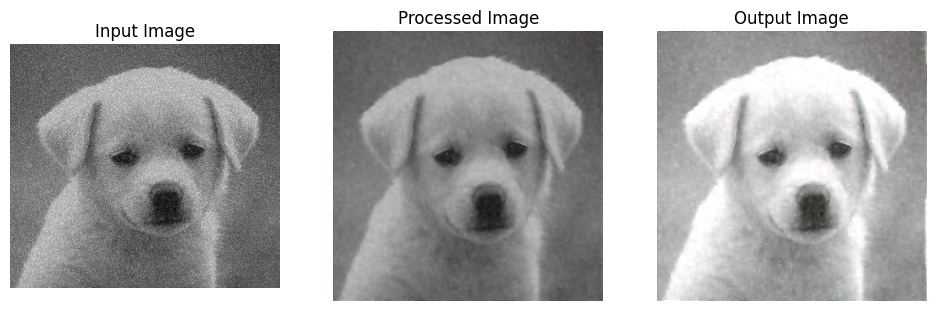

In [17]:
predict_images3(input_img,denoised,enhanced)

In [18]:
input = "/kaggle/input/final-testing/test2_img.png"

In [19]:
img = cv.imread(input, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)


In [20]:
if isinstance(input, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input, np.ndarray):  # If it's already an array
    input_img = (input * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input.numpy() * 255).astype('uint8')

In [21]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [22]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


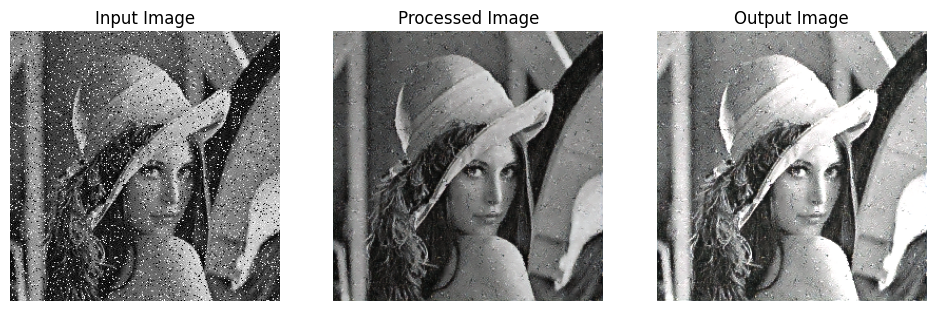

In [23]:
predict_images3(input_img,denoised,enhanced)

In [24]:
input3 = "/kaggle/input/final-testing/test3_img.png"

In [25]:
img = cv.imread(input3, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)


In [26]:
if isinstance(input3, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input3), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input3, np.ndarray):  # If it's already an array
    input_img = (input3 * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input3.numpy() * 255).astype('uint8')

In [27]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [28]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


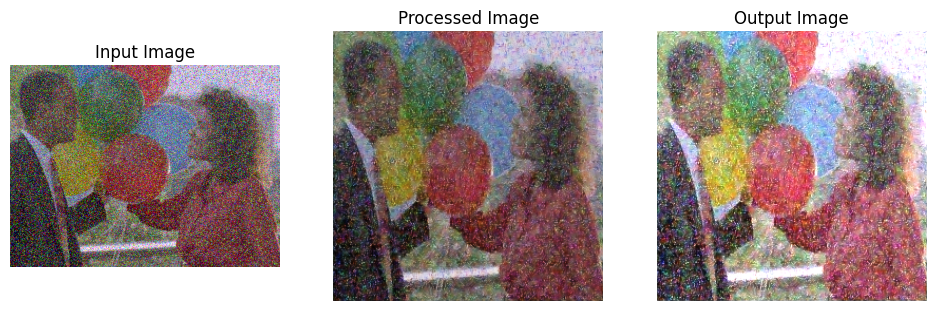

In [29]:
predict_images3(input_img,denoised,enhanced)

In [30]:
input4 = "/kaggle/input/final-testing/test17_img.jpg"

In [31]:
img = cv.imread(input4, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)


In [32]:
if isinstance(input4, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input4), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input4, np.ndarray):  # If it's already an array
    input_img = (input4 * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input4.numpy() * 255).astype('uint8')

In [33]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [34]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


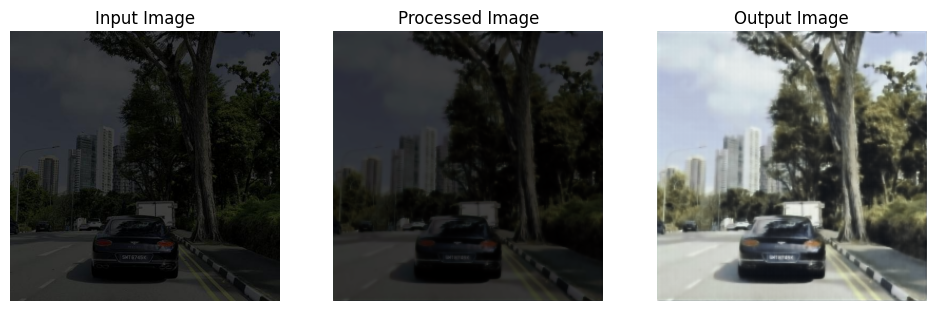

In [35]:
predict_images3(input_img,denoised,enhanced)

In [36]:
input = "/kaggle/input/final-testing/test6_img.jpg"

In [37]:
img = cv.imread(input, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)


In [38]:
if isinstance(input, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input, np.ndarray):  # If it's already an array
    input_img = (input * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input.numpy() * 255).astype('uint8')

In [39]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [40]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


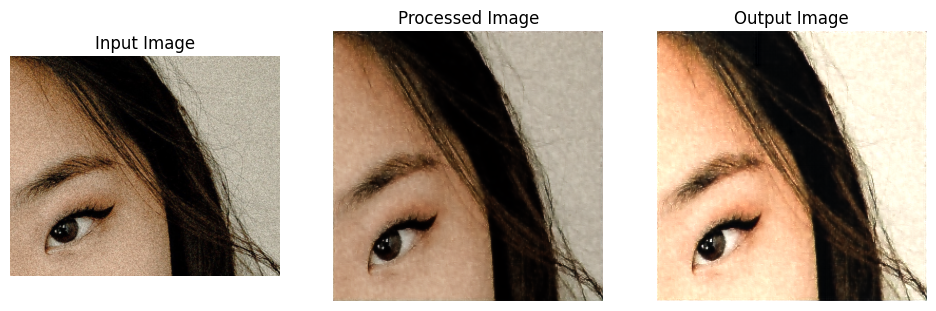

In [41]:
predict_images3(input_img,denoised,enhanced)

In [42]:
input = "/kaggle/input/final-testing/test7_img.jpg"

In [43]:
img = cv.imread(input, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)


In [44]:
if isinstance(input, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input, np.ndarray):  # If it's already an array
    input_img = (input * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input.numpy() * 255).astype('uint8')

In [45]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [46]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


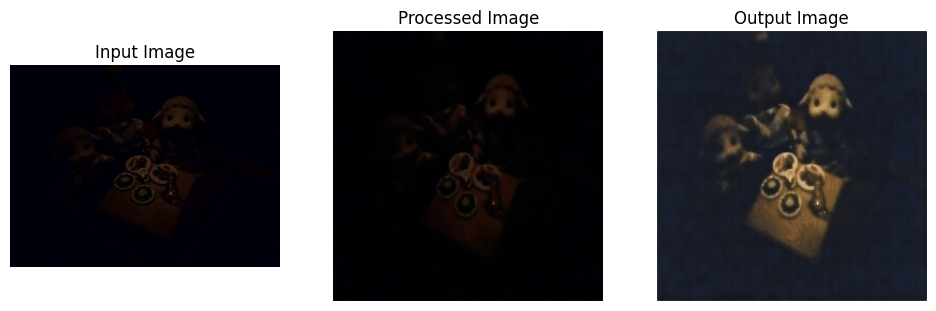

In [47]:
predict_images3(input_img,denoised,enhanced)

In [48]:
input = "/kaggle/input/final-testing/test8_img.png"

In [49]:
img = cv.imread(input, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)


In [50]:
if isinstance(input, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input, np.ndarray):  # If it's already an array
    input_img = (input * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input.numpy() * 255).astype('uint8')

In [51]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [52]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


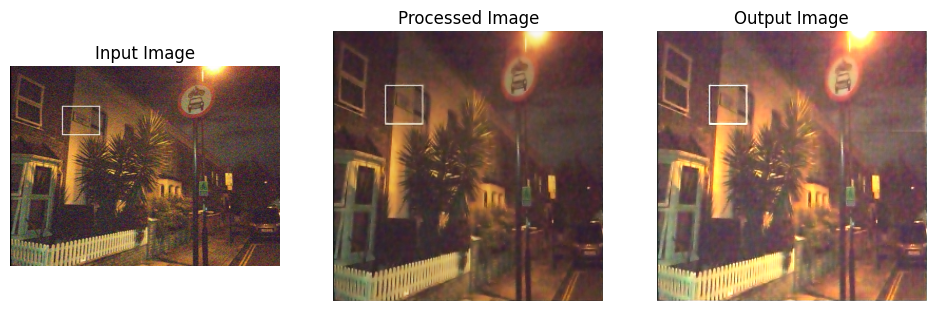

In [53]:
predict_images3(input_img,denoised,enhanced)

In [54]:
input = "/kaggle/input/final-testing/test11_img.jpg"

In [55]:
img = cv.imread(input, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)

In [56]:
if isinstance(input, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input, np.ndarray):  # If it's already an array
    input_img = (input * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input.numpy() * 255).astype('uint8')

In [57]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [58]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [59]:
output = resolution.predict(np.expand_dims(enhanced, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


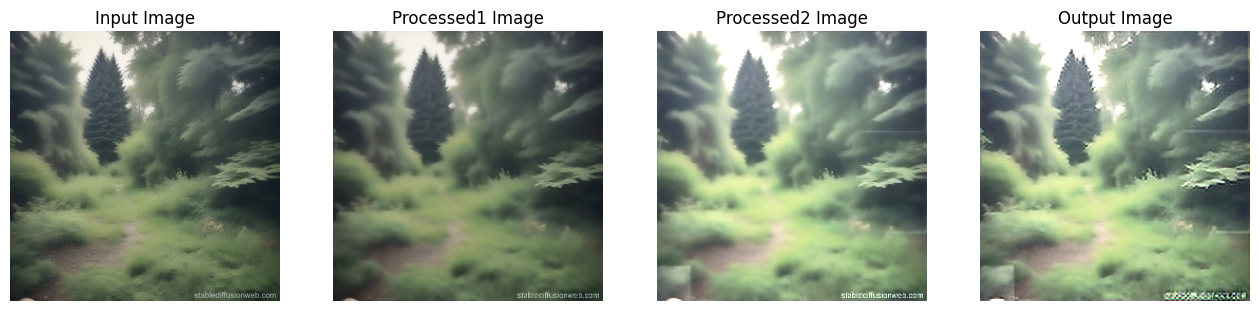

In [60]:
predict_images4(input_img,denoised,enhanced,output)

In [61]:
input = "/kaggle/input/final-testing/test20_img.png"

In [62]:
img = cv.imread(input, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)

In [63]:
if isinstance(input, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input, np.ndarray):  # If it's already an array
    input_img = (input * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input.numpy() * 255).astype('uint8')

In [64]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [65]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


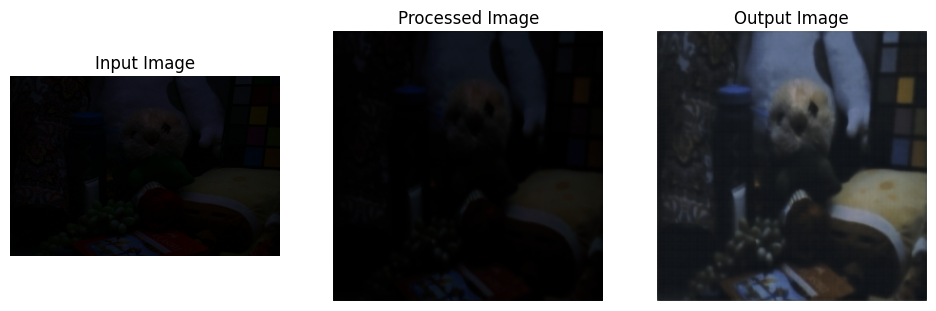

In [66]:
predict_images3(input_img,denoised,enhanced)

In [67]:
input = "/kaggle/input/final-testing/test19_img.png"

In [68]:
img = cv.imread(input, cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (256, 256))
img = img.astype('float32') / 255.0

img_tensortest = tf.convert_to_tensor(img, dtype=tf.float32)

In [69]:
if isinstance(input, str):  # If it's a file path
    input_img = cv.cvtColor(cv.imread(input), cv.COLOR_BGR2RGB)
    input_img = input_img.astype('float32') / 255.0  # Normalize to [0, 1]
elif isinstance(input, np.ndarray):  # If it's already an array
    input_img = (input * 255).astype('uint8')
else:  # Handle tensors
    input_img = (input.numpy() * 255).astype('uint8')

In [70]:
denoised = denoising.predict(np.expand_dims(img_tensortest, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [71]:
enhanced = light_enhancement.predict(np.expand_dims(denoised, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


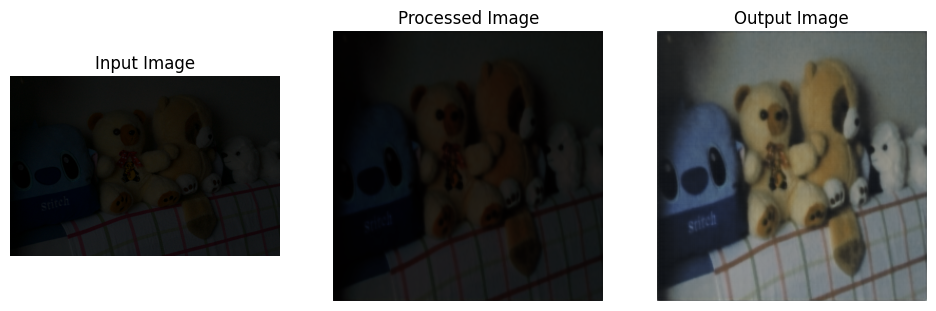

In [72]:
predict_images3(input_img,denoised,enhanced)